<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo 07** | Python: Programação Orientada a Objetos
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

Aluno [Roberto Hatiro](https://www.linkedin.com/in/rhatiro/)<br>
Data: 16 de janeiro de 2023.

---

# **Tópicos**

<ol type="1">
  <li>from / import / as;</li>
  <li>Módulo;</li>
  <li>Pacote;</li>
  <li>Baixando pacotes.</li>
</ol>

---

# **Exercícios**

## 0\. Preparação do ambiente

Neste exercício vamos utilizar a base de dados de ações da bolsa de valores dos EUA, a Dow Jones. Os dados estão disponíveis para *download* neste [link](https://archive.ics.uci.edu/ml/datasets/Dow+Jones+Index). Vamos utilizar o pacote `wget` para fazer o *download* dos dados.

 - Instalando o pacote `wget` na versão 3.2.

In [1]:
!pip install wget==3.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=e05016ca8a8680f9a2279613b6e0acef6b622748f719634cfebc222aee0e837c
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


 - Fazendo o download dos dados no arquivo compactado `dados.zip`.

In [2]:
import wget

wget.download(url='https://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip', out='./dados.zip')

'./dados.zip'

 - Descompactando os `dados` na pasta dados com o pacote nativo `zipfile`.

In [3]:
import zipfile

with zipfile.ZipFile('./dados.zip', 'r') as fp:
  fp.extractall('./dados')

Verifique a pasta dados criada, ela deve conter dois arquivos:

 - **dow_jones_index.data**: um arquivo com os dados;
 - **dow_jones_index.names**: um arquivo com a descrição completa dos dados.

É possível observar que o arquivo de dados é um arquivo separado por virgulas, o famoso `csv`. Vamos renomear o arquivo de dados para que ele tenha a extensão `csv` com o pacote nativo `os`.

- Renomeando o arquivo com o pacote nativo `os`.

In [4]:
import os

os.rename('./dados/dow_jones_index.data', './dados/dow_jones_index.csv')

Pronto! Abra o arquivo e o Google Colab irá apresentar uma visualização bem legal dos dados.

---

## 1\. Pandas

Para processar os dados, vamos utilizar o pacote `pandas` na versão `1.1.5`. A documentação completa por ser encontrada neste [link](https://pandas.pydata.org/docs/)

In [5]:
!pip install pandas==1.1.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 40.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 2022.12.0 requires pandas>=1.3, but you have pandas 1.1.5 which is incompatible.


Vamos importar o pacote com o apelido (alias) `pd`.

In [6]:
import pandas as pd

Estamos prontos para ler o arquivo.

In [7]:
df = pd.read_csv('./dados/dow_jones_index.csv')

O pandas trabalha com o conceito de dataframe, uma estrutura de dados com muitos métodos e atributos que aceleram o processamento de dados. Alguns exemplos:

 - Visualizando as `n` primeiras linhas:

In [8]:
df.head(n=10)

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.792670,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.428490,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.470660,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.638310,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.933250,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
5,1,AA,2/11/2011,$17.33,$17.48,$16.97,$17.37,114691279,0.230814,-25.712195,154387761.0,$17.39,$17.28,-0.632547,90,0.172712
6,1,AA,2/18/2011,$17.39,$17.68,$17.28,$17.28,80023895,-0.632547,-30.226696,114691279.0,$16.98,$16.68,-1.766780,83,0.173611
7,1,AA,2/25/2011,$16.98,$17.15,$15.96,$16.68,132981863,-1.766780,66.177694,80023895.0,$16.81,$16.58,-1.368230,76,0.179856
8,1,AA,3/4/2011,$16.81,$16.94,$16.13,$16.58,109493077,-1.368230,-17.663150,132981863.0,$16.58,$16.03,-3.317250,69,0.180941
9,1,AA,3/11/2011,$16.58,$16.75,$15.42,$16.03,114332562,-3.317250,4.419900,109493077.0,$15.95,$16.11,1.003130,62,0.187149


 - Visualizando o nome das colunas:

In [9]:
df.columns.to_list()

['quarter',
 'stock',
 'date',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'percent_change_price',
 'percent_change_volume_over_last_wk',
 'previous_weeks_volume',
 'next_weeks_open',
 'next_weeks_close',
 'percent_change_next_weeks_price',
 'days_to_next_dividend',
 'percent_return_next_dividend']

 - Verificando o número de linhas e colunas.

In [10]:
linhas, colunas = df.shape
print(f'Número de linhas: {linhas}')
print(f'Número de colunas: {colunas}')

Número de linhas: 750
Número de colunas: 16


Vamos selecionar os valores de abertura, fechamento, máximo e mínimo das ações do McDonalds, listado na Dow Jones como MCD:

 - Selecionando as linha do dataframe original `df` em que a coluna `stock` é igual a `MCD`.

In [11]:
df_mcd = df[df['stock'] == 'MCD']

 - Selecionando apenas as colunas de data e valores de ações.

In [12]:
df_mcd = df_mcd[['date', 'open', 'high', 'low', 'close']]

Excelente, o problema é que as colunas com os valores possuem o carater `$` e são do tipo texto (`object` no `pandas`).

In [13]:
df_mcd.head(n=10)

,date,open,high,low,close
216,1/7/2011,$77.10,$77.59,$73.59,$74.37
217,1/14/2011,$74.25,$74.49,$72.46,$74.06
218,1/21/2011,$74.65,$75.75,$74.31,$75.01
219,1/28/2011,$74.25,$75.85,$73.05,$73.28
220,2/4/2011,$73.80,$74.50,$73.08,$74.05
221,2/11/2011,$74.13,$76.32,$73.30,$76.14
222,2/18/2011,$76.07,$76.45,$75.70,$76.13
223,2/25/2011,$75.95,$76.45,$74.42,$74.44
224,3/4/2011,$74.51,$76.63,$73.64,$76.03
225,3/11/2011,$76.38,$77.25,$74.97,$76.73


In [14]:
df_mcd.dtypes

date     object
open     object
high     object
low      object
close    object
dtype: object

Vamos limpar as colunas com o método `apply`, que permite a aplicação de uma função anônima (`lambda`) qualquer. A função `lambda` remove o caracter **$** e faz a conversão do tipo de `str` para `float`.

In [15]:
for col in ['open', 'high', 'low', 'close']:
  df_mcd[col] = df_mcd[col].apply(lambda value: float(value.split(sep='$')[-1]))

Verifique novamente os dados e seus tipos.

In [16]:
df_mcd.head(n=10)

,date,open,high,low,close
216,1/7/2011,77.10,77.59,73.59,74.37
217,1/14/2011,74.25,74.49,72.46,74.06
218,1/21/2011,74.65,75.75,74.31,75.01
219,1/28/2011,74.25,75.85,73.05,73.28
220,2/4/2011,73.80,74.50,73.08,74.05
221,2/11/2011,74.13,76.32,73.30,76.14
222,2/18/2011,76.07,76.45,75.70,76.13
223,2/25/2011,75.95,76.45,74.42,74.44
224,3/4/2011,74.51,76.63,73.64,76.03
225,3/11/2011,76.38,77.25,74.97,76.73


In [17]:
df_mcd.dtypes

date      object
open     float64
high     float64
low      float64
close    float64
dtype: object

Excelente, agora podemos explorar os dados visualmente.

**Agora é a sua vez!** Conduza o mesmo processo para extrair e tratar os dados da empresa Coca-Cola (`stock` column igual a `KO`).

 - Selecionando as linha do dataframe original `df` em que a coluna `stock` é igual a `KO`.

In [18]:
# extração e tratamento dos dados da empresa Coca-Cola.

df_ko = df[df['stock'] == 'KO']

df_ko.head(n=3) # Visualização das 3 primeiras linhas

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
204,1,KO,1/7/2011,$65.88,$65.88,$62.56,$62.92,59802189,-4.493020,NaN,NaN,$62.70,$63.13,0.685805,63,0.746980
205,1,KO,1/14/2011,$62.70,$63.86,$62.56,$63.13,31297830,0.685805,-47.664407,59802189.0,$63.21,$62.77,-0.696092,56,0.744496
206,1,KO,1/21/2011,$63.21,$63.92,$62.72,$62.77,36000586,-0.696092,15.025821,31297830.0,$62.87,$62.21,-1.049790,49,0.748765


In [19]:
linhas_ko, colunas_ko = df_ko.shape

print('Dataframe da empresa Coca-Cola:\n')
print(f'Número de linhas: {linhas_ko}')
print(f'Número de colunas: {colunas_ko}')

Dataframe da empresa Coca-Cola:

Número de linhas: 25
Número de colunas: 16


Vamos selecionar os valores de abertura, fechamento, máximo e mínimo das ações da empresa Coca-Cola, listado na Dow Jones como KO:

 - Selecionando apenas as colunas de data e valores de ações.

In [20]:
df_ko = df_ko[['date', 'open', 'high', 'low', 'close']]

df_ko.tail(n=3) # Visualização das 3 últimas linhas

,date,open,high,low,close
591,6/10/2011,$65.51,$68.05,$65.07,$65.39
592,6/17/2011,$65.10,$66.23,$64.64,$65.62
593,6/24/2011,$65.37,$66.82,$64.43,$64.93


Excelente, o problema é que as colunas com os valores possuem o carater `$` e são do tipo texto (`object` no `pandas`).

In [21]:
# Visualize os dados do dataframe

df_ko

,date,open,high,low,close
204,1/7/2011,$65.88,$65.88,$62.56,$62.92
205,1/14/2011,$62.70,$63.86,$62.56,$63.13
206,1/21/2011,$63.21,$63.92,$62.72,$62.77
207,1/28/2011,$62.87,$63.31,$62.14,$62.21
208,2/4/2011,$62.32,$63.48,$61.89,$62.56
209,2/11/2011,$62.67,$64.75,$62.32,$63.57
210,2/18/2011,$63.67,$64.72,$62.55,$64.55
211,2/25/2011,$63.36,$64.40,$63.33,$64.31
212,3/4/2011,$64.17,$65.87,$63.86,$65.21
213,3/11/2011,$65.32,$65.84,$64.47,$64.81


In [22]:
# Verifique o tipo dos dados

df_ko.dtypes

date     object
open     object
high     object
low      object
close    object
dtype: object

Vamos limpar as colunas com o método `apply`, que permite a aplicação de uma função anônima (`lambda`) qualquer. A função `lambda` remove o caracter **$** e faz a conversão do tipo de `str` para `float`.

In [23]:
for col in ['open', 'high', 'low', 'close']:
  df_ko[col] = df_ko[col].apply(lambda value: float(value.split(sep='$')[-1]))

df_ko.head()

,date,open,high,low,close
204,1/7/2011,65.88,65.88,62.56,62.92
205,1/14/2011,62.70,63.86,62.56,63.13
206,1/21/2011,63.21,63.92,62.72,62.77
207,1/28/2011,62.87,63.31,62.14,62.21
208,2/4/2011,62.32,63.48,61.89,62.56


Verifique novamente os dados e seus tipos.

In [24]:
# Visualize novamente os dados do dataframe

df_ko

,date,open,high,low,close
204,1/7/2011,65.88,65.88,62.56,62.92
205,1/14/2011,62.70,63.86,62.56,63.13
206,1/21/2011,63.21,63.92,62.72,62.77
207,1/28/2011,62.87,63.31,62.14,62.21
208,2/4/2011,62.32,63.48,61.89,62.56
209,2/11/2011,62.67,64.75,62.32,63.57
210,2/18/2011,63.67,64.72,62.55,64.55
211,2/25/2011,63.36,64.40,63.33,64.31
212,3/4/2011,64.17,65.87,63.86,65.21
213,3/11/2011,65.32,65.84,64.47,64.81


In [25]:
# Verifique novamente o tipo dos dados

df_ko.dtypes

date      object
open     float64
high     float64
low      float64
close    float64
dtype: object

Excelente, agora podemos explorar os dados visualmente.

---

## 2\. Seaborn

Para visualizar os dados, vamos utilizar o pacote `seaborn` na versão `0.11.1`. A documentação completa por ser encontrada neste [link](https://seaborn.pydata.org/)

In [26]:
!pip install seaborn==0.11.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.0/285.0 KB 10.4 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


Vamos importar o pacote com o apelido (alias) `sns`.

In [27]:
import seaborn as sns

Vamos visualizar os valores de abertura das ações ao longo do tempo.

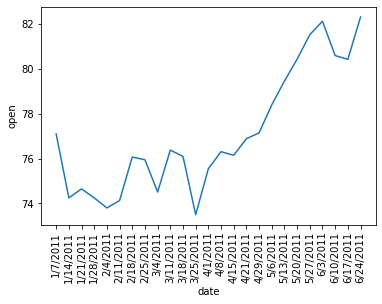

In [28]:
plot = sns.lineplot(x="date", y="open", data=df_mcd)
_ = plot.set_xticklabels(labels=df_mcd['date'], rotation=90)

Vamos também visualizar os valores de fechamento das ações ao longo do tempo.

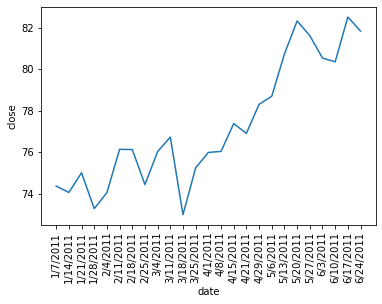

In [29]:
plot = sns.lineplot(x="date", y="close", data=df_mcd)
_ = plot.set_xticklabels(labels=df_mcd['date'], rotation=90)

Para facilitar a comparação, vamo visualizar os quatro valores no mesmo gráfico.

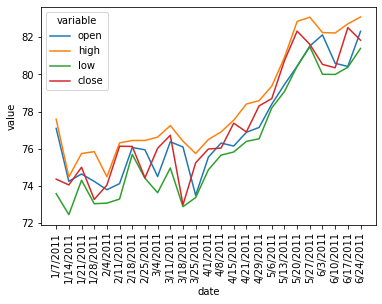

In [30]:
plot = sns.lineplot(x="date", y="value", hue='variable', data=pd.melt(df_mcd, ['date']))
_ = plot.set_xticklabels(labels=df_mcd['date'], rotation=90)

Para finalizar, vamos salvar o gráfico numa figura.

In [31]:
plot.figure.savefig("./mcd.png")

**Agora é a sua vez,** faça o gráfico acima para a empresa Coca-Cola e salve a imagem com o nome `ko.png`.

In [32]:
# visualização dos dados da Coca-Cola.

df_ko.head()

,date,open,high,low,close
204,1/7/2011,65.88,65.88,62.56,62.92
205,1/14/2011,62.70,63.86,62.56,63.13
206,1/21/2011,63.21,63.92,62.72,62.77
207,1/28/2011,62.87,63.31,62.14,62.21
208,2/4/2011,62.32,63.48,61.89,62.56


Vamos visualizar os valores de abertura das ações ao longo do tempo.

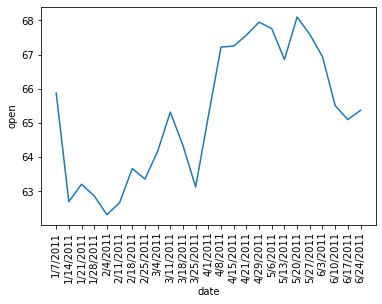

In [33]:
plot_ko = sns.lineplot(x="date", y="open", data=df_ko)
_ = plot_ko.set_xticklabels(labels=df_ko['date'], rotation=90)

Vamos também visualizar os valores de fechamento das ações ao longo do tempo.

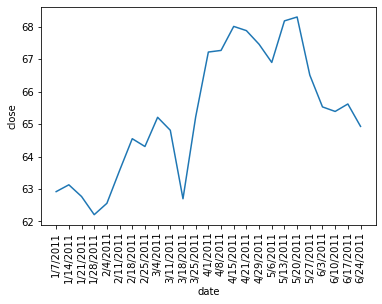

In [34]:
plot_ko = sns.lineplot(x="date", y="close", data=df_ko)
_ = plot_ko.set_xticklabels(labels=df_ko['date'], rotation=90)

Para facilitar a comparação, vamo visualizar os quatro valores no mesmo gráfico.

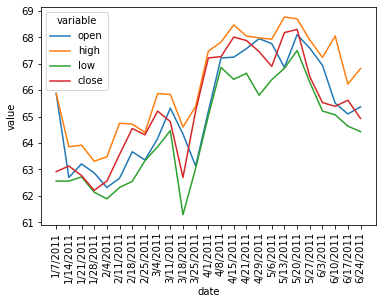

In [35]:
plot_ko = sns.lineplot(x="date", y="value", hue='variable', data=pd.melt(df_ko, ['date']))
_ = plot_ko.set_xticklabels(labels=df_ko['date'], rotation=90)

Para finalizar, vamos salvar o gráfico numa figura.

In [36]:
plot_ko.figure.savefig("./ko.png")

Analise as duas imagens e escreva pelo menos um *insight* que você consegue extrair dos dados. Fique a vontade para escrever quantos *insights* você quiser.

Obs: *Insights* são observações sobre o que você percebe/entende/interpreta em suas análises. No caso deste exercício, você vai analisar os dados dos gráficos da empresa McDonalds e da empresa Cola-Cola e notar o que pode ser interessante nos dados gerados e que tipo de interpretação o comportamento dos dados estão te trazendo.

---

**Insight #1**: ...

Ao visualizar os gráficos apresentados, é possível notar uma variação no meio do período que foge do padrão inicial, tendo como consequência uma alta nos valores finais. Sendo assim seria interessante buscar os acontecimentos dentro deste período para realizar novas análises tendo como 'alvo' essas possíveis variáveis.

**Insight #2**: ...

Em relação a comparação entre os dados das duas empresas, tendo como referência de análise o mesmo período de aproximadamente cinco meses e meio, podemos constatar que ambas tiveram alta nos valores, porém a empresa McDonalds teve uma variação um pouco maior do que a empresa Coca-Cola, fechando com alta de \$7,47 enquanto a empresa Coca-Cola fechou com alta de \$2,01.

**Insight #3**: ...

Também é possível notar que as duas empresas tiveram o comportamento de alternância entre as variáveis apresentadas em diversos períodos, porém na empresa McDonalds houveram mais dias com o valor `close` maior do que o valor `open`. 

Concluímos então dentro desta análise realizada que a empresa McDonalds obteve melhores resultados em comparação com a empresa Coca-Cola.

---

Análises dos valores de cada coluna dos gráficos com as respectivas variações entre o período dos dados apresentados:

In [37]:
ko_colunas = df_ko.columns.to_list()
print(f'Colunas KO: {ko_colunas}')
mcd_colunas = df_mcd.columns.to_list()
print(f'Colunas MCD: {mcd_colunas}')

Colunas KO: ['date', 'open', 'high', 'low', 'close']
Colunas MCD: ['date', 'open', 'high', 'low', 'close']


In [38]:
# from functools import reduce

In [39]:
print(f'Análise dos valores de cada coluna da empresa MCD:\n')

for coluna in mcd_colunas[1:]:
  valores_coluna = df_mcd[coluna]
  
  print(f'A análise da coluna {coluna.upper()} inicia em {df_mcd.iloc[0, 0]} com o valor de ${valores_coluna.iloc[0]} e termina em {df_mcd.iloc[-1, 0]} com o valor de ${valores_coluna.iloc[-1]}')
  
  if (coluna == 'close') & (valores_coluna.iloc[-1] > valores_coluna.iloc[0]):
    print(f'ALTA DE ${round(valores_coluna.iloc[-1] - valores_coluna.iloc[0], 2)}')
  elif (coluna == 'close') & (valores_coluna.iloc[-1] < valores_coluna.iloc[0]):
    print(f'BAIXA DE ${round(valores_coluna.iloc[-1] - valores_coluna.iloc[0], 2)}')

  # menor_mcd = reduce(lambda x, y: x if x <= y else y, valores_coluna)
  # print(f"O MENOR valor da coluna {coluna.upper()} de MCD entre {df_mcd['date'].iloc[0]} até {df_mcd['date'].iloc[-1]} é: ${menor_mcd}")
  menor_mcd = valores_coluna.min()
  print(f"O MENOR valor da coluna {coluna.upper()} de MCD entre {df_mcd['date'].iloc[0]} e {df_mcd['date'].iloc[-1]} é: ${menor_mcd}")

  # maior_mcd = reduce(lambda x, y: x if x >= y else y, valores_coluna)
  # print(f"O MAIOR valor da coluna {coluna.upper()} de MCD entre {df_mcd['date'].iloc[0]} até {df_mcd['date'].iloc[-1]} é: ${maior_mcd}")
  maior_mcd = valores_coluna.max()
  print(f"O MAIOR valor da coluna {coluna.upper()} de MCD entre {df_mcd['date'].iloc[0]} e {df_mcd['date'].iloc[-1]} é: ${maior_mcd}")

  variacao_mcd = round(maior_mcd - menor_mcd, 2)
  print(f'Variação entre os valores no período analisado: ${variacao_mcd}\n')

Análise dos valores de cada coluna da empresa MCD:

A análise da coluna OPEN inicia em 1/7/2011 com o valor de $77.1 e termina em 6/24/2011 com o valor de $82.32
O MENOR valor da coluna OPEN de MCD entre 1/7/2011 e 6/24/2011 é: $73.5
O MAIOR valor da coluna OPEN de MCD entre 1/7/2011 e 6/24/2011 é: $82.32
Variação entre os valores no período analisado: $8.82

A análise da coluna HIGH inicia em 1/7/2011 com o valor de $77.59 e termina em 6/24/2011 com o valor de $83.09
O MENOR valor da coluna HIGH de MCD entre 1/7/2011 e 6/24/2011 é: $74.49
O MAIOR valor da coluna HIGH de MCD entre 1/7/2011 e 6/24/2011 é: $83.09
Variação entre os valores no período analisado: $8.6

A análise da coluna LOW inicia em 1/7/2011 com o valor de $73.59 e termina em 6/24/2011 com o valor de $81.4
O MENOR valor da coluna LOW de MCD entre 1/7/2011 e 6/24/2011 é: $72.46
O MAIOR valor da coluna LOW de MCD entre 1/7/2011 e 6/24/2011 é: $81.49
Variação entre os valores no período analisado: $9.03

A análise da coluna

In [40]:
print(f'Análise dos valores de cada coluna da empresa KO:\n')

for coluna in ko_colunas[1:]:
  valores_coluna = df_ko[coluna]

  print(f'A análise da coluna {coluna.upper()} inicia em {df_mcd.iloc[0, 0]} com o valor de ${valores_coluna.iloc[0]} e termina em {df_mcd.iloc[-1, 0]} com o valor de ${valores_coluna.iloc[-1]}')
  
  if (coluna == 'close') & (valores_coluna.iloc[-1] > valores_coluna.iloc[0]):
    print(f'ALTA DE ${round(valores_coluna.iloc[-1] - valores_coluna.iloc[0], 2)}')
  elif (coluna == 'close') & (valores_coluna.iloc[-1] < valores_coluna.iloc[0]):
    print(f'BAIXA DE ${round(valores_coluna.iloc[-1] - valores_coluna.iloc[0], 2)}')

  # menor_ko = reduce(lambda x, y: x if x <= y else y, valores_coluna)
  # print(f"O MENOR valor da coluna {coluna.upper()} de KO entre {df_ko['date'].iloc[0]} até {df_ko['date'].iloc[-1]} é: ${menor_ko}")
  menor_ko = valores_coluna.min()
  print(f"O MENOR valor da coluna {coluna.upper()} de KO entre {df_ko['date'].iloc[0]} e {df_ko['date'].iloc[-1]} é: ${menor_ko}")

  # maior_ko = reduce(lambda x, y: x if x >= y else y, valores_coluna)
  # print(f"O MAIOR valor da coluna {coluna.upper()} de KO entre {df_ko['date'].iloc[0]} até {df_ko['date'].iloc[-1]} é: ${maior_ko}")
  maior_ko = valores_coluna.max()
  print(f"O MAIOR valor da coluna {coluna.upper()} de KO entre {df_ko['date'].iloc[0]} e {df_ko['date'].iloc[-1]} é: ${maior_ko}")

  variacao_ko = round(maior_ko - menor_ko, 2)
  print(f'Variação entre os valores no período analisado: ${variacao_ko}\n')

Análise dos valores de cada coluna da empresa KO:

A análise da coluna OPEN inicia em 1/7/2011 com o valor de $65.88 e termina em 6/24/2011 com o valor de $65.37
O MENOR valor da coluna OPEN de KO entre 1/7/2011 e 6/24/2011 é: $62.32
O MAIOR valor da coluna OPEN de KO entre 1/7/2011 e 6/24/2011 é: $68.1
Variação entre os valores no período analisado: $5.78

A análise da coluna HIGH inicia em 1/7/2011 com o valor de $65.88 e termina em 6/24/2011 com o valor de $66.82
O MENOR valor da coluna HIGH de KO entre 1/7/2011 e 6/24/2011 é: $63.31
O MAIOR valor da coluna HIGH de KO entre 1/7/2011 e 6/24/2011 é: $68.77
Variação entre os valores no período analisado: $5.46

A análise da coluna LOW inicia em 1/7/2011 com o valor de $62.56 e termina em 6/24/2011 com o valor de $64.43
O MENOR valor da coluna LOW de KO entre 1/7/2011 e 6/24/2011 é: $61.29
O MAIOR valor da coluna LOW de KO entre 1/7/2011 e 6/24/2011 é: $67.5
Variação entre os valores no período analisado: $6.21

A análise da coluna CLOS

Comparação entre os valores diários de `open` e `close` em cada empresa:

In [41]:
mcd_qtd_open = 0
mcd_qtd_close = 0

for linha in df_mcd.iterrows():
  if linha[1]['open'] > linha[1]['close']:
    mcd_qtd_open += 1
  elif linha[1]['open'] < linha[1]['close']:
    mcd_qtd_close += 1

print(f'Quantidade de dias com o valor de abertura maior do que o valor de fechamento na empresa McDonalds: {mcd_qtd_open}')
print(f'Quantidade de dias com o valor de fechamento maior do que o valor de abertura na empresa McDonalds: {mcd_qtd_close}')

Quantidade de dias com o valor de abertura maior do que o valor de fechamento na empresa McDonalds: 9
Quantidade de dias com o valor de fechamento maior do que o valor de abertura na empresa McDonalds: 16


In [42]:
ko_qtd_open = 0
ko_qtd_close = 0

for linha in df_ko.iterrows():
  if linha[1]['open'] > linha[1]['close']:
    ko_qtd_open += 1
  if linha[1]['open'] < linha[1]['close']:
    ko_qtd_close += 1

print(f'Quantidade de dias com o valor de abertura maior do que o valor de fechamento na empresa Coca-Cola: {ko_qtd_open}')
print(f'Quantidade de dias com o valor de fechamento maior do que o valor de abertura na empresa Coca-Cola: {ko_qtd_close}')

Quantidade de dias com o valor de abertura maior do que o valor de fechamento na empresa Coca-Cola: 11
Quantidade de dias com o valor de fechamento maior do que o valor de abertura na empresa Coca-Cola: 14


Comparação da quantidade de dias com o valor de fechamento acima do valor de abertura entre as duas empresas:

In [43]:
if mcd_qtd_close > ko_qtd_close:
  print(f'A empresa McDonalds teve uma maior quantidade de dias com o valor de fechamento acima do valor de abertura em comparação com a empresa Coca-Cola.')
elif mcd_qtd_close < ko_qtd_close:
  print(f'A empresa Coca-Cola teve uma maior quantidade de dias com o valor de fechamento acima do valor de abertura em comparação com a empresa McDonalds.')
else:
  print("As duas empresas tiveram a mesma quantidade de dias com o valor de fechamento acima do valor de abertura.")

A empresa McDonalds teve uma maior quantidade de dias com o valor de fechamento acima do valor de abertura em comparação com a empresa Coca-Cola.


---